In [116]:
"""
The purpose of the algorithm is not to recover the original network but 
rather to identify important nodes and understand their impact on the network structure
"""
import networkx as nx
import matplotlib.pyplot as plt

In [117]:
# Load the original graph
G = nx.karate_club_graph()
print(G)
# Compute the betweenness centrality for each node
betweenness = nx.betweenness_centrality(G)
print(betweenness)
# Sort nodes in descending order based on betweenness centrality score
sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
print(sorted_nodes)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
[0, 33, 32, 2, 31, 8, 1, 13, 19, 5, 6, 27, 23, 30, 3, 25, 29, 24, 28, 9, 4, 10, 7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26]


In [118]:
""" 
Remove nodes starting with highest betweenness centrality score
A node is having High betweenness centrality means it falls in between shortest paths of 
many nodes Due to this, there can be congestion in that particular node and leads to 
bottleneck and eventually Slows down the networkin most real-world networks, there are often
multiple shortest paths between pairs of nodes, not just one. So even if we remove a node
that lies on one shortest path, there may be other paths that can still connect the same 
pair of nodes.So by removing the node we force some traffic to take alternative routes
that improves network efficiency
"""
threshold = 0.8 #We want to retain at least 80% of the nodes
removed_nodes = set()
for node in sorted_nodes:
    #Removing the node that is having the highest betweenness centrality
    print(node)
    G.remove_node(node)
    removed_nodes.add(node)
    if len(removed_nodes) > 0:
        remaining_graph = G.subgraph(G.nodes - removed_nodes)
        #Finding the largest connected component
        largest_cc = max(nx.connected_components(remaining_graph), key=len)
        #Checking whether the size of the largest connected component 
        #of the subgraph obtained by removing nodes with high betweenness centrality
        #is smaller than a certain fraction of the size of the original network.
        if len(largest_cc) < threshold * len(G):
            break

0
33
32


{0, 33, 32}


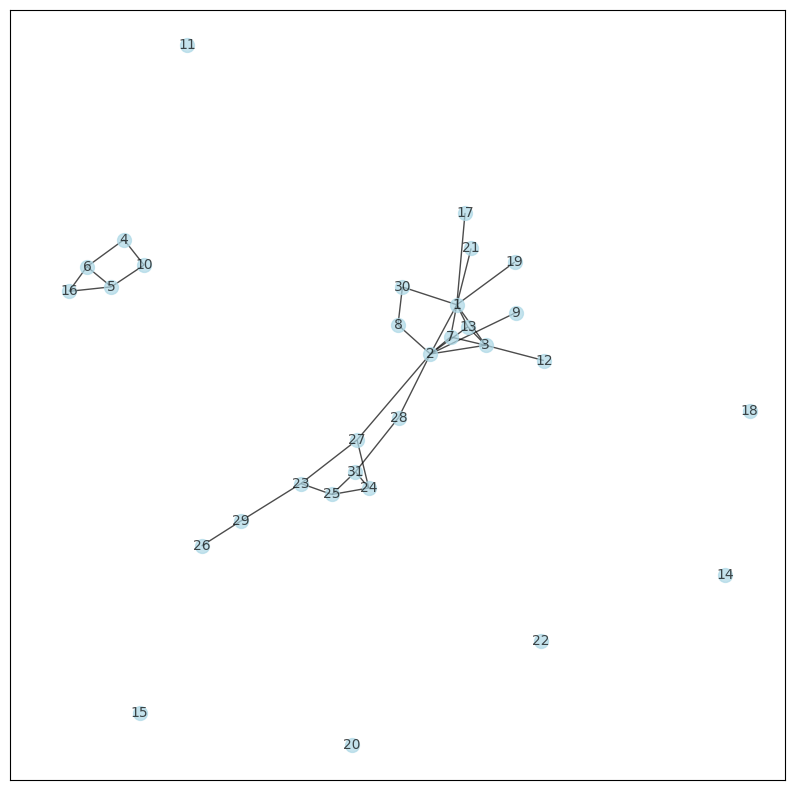

In [119]:
# Draw the remaining graph
print(removed_nodes)
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(G, pos=nx.spring_layout(G, k=0.3), with_labels=True, node_size=100, font_size=10, node_color='lightblue', edge_color='black', width=1.0, alpha=0.7, ax=ax)

In [120]:
"""Finding Similarity between two graphs with respect to the betweenness centrality"""
#The first graph is the original graph
G1 = nx.karate_club_graph()
"""Setting the size to the size of the orginal graph"""
size= len(G1)
#The second graph is the reduced graph
G2 = G
print(len(G2))
# Calculate betweenness centrality for the first graph
betweenness_centrality1 = nx.betweenness_centrality(G1)

# Calculate betweenness centrality for the second graph
betweenness_centrality2 = nx.betweenness_centrality(G1)
print(betweenness_centrality2)

# Calculate the average absolute difference between centrality values
differences = []
for node in G1.nodes():
    centrality1 = betweenness_centrality1[node]
    if node not in removed_nodes:
        centrality2 = betweenness_centrality2[node]
    else:
        centrality2=0
    difference = abs(centrality1 - centrality2)
    differences.append(difference)

average_difference = sum(differences) / len(differences)

# Calculate the similarity percentage
similarity_percentage = (1 - average_difference) * 100

print(f"The similarity of betweenness centrality is {similarity_percentage:.2f}%")

31
{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
The similarity of betweenness centrality is 97.39%


In [121]:
"""Calculating Similarity between the original graph and the reduced graph with respect to
the degree distribution"""
# Find the degree sequence
"""Finding the degree sequence of the Original Graph"""
degree_sequence1 = [degree for node, degree in G1.degree()]

# Print the degree sequence
print("Degree sequence:", degree_sequence1)

# Find the degree sequence
"""Finding the degree sequence of the Reduced Graph"""
degree_sequence2 = [degree for node, degree in G2.degree()]

# Print the degree sequence
print("Degree sequence:", degree_sequence2)

Degree sequence: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Degree sequence: [8, 8, 5, 2, 3, 3, 3, 2, 1, 2, 0, 1, 3, 0, 0, 2, 1, 0, 1, 0, 1, 0, 3, 3, 3, 1, 3, 2, 2, 2, 3]


In [122]:
import numpy as np
"""Calculate Degree Distribution from a given degree and number of nodes"""
def calculate_degree_distribution(degree_sequence,size):
    # Initialize an array to store the degree distribution
    degree_distribution = np.zeros(size)
    # Calculate the degree distribution
    for degree in degree_sequence:
        if degree < size:
            degree_distribution[degree] += 1

    # Normalize the degree distribution to get probabilities
    degree_distribution = degree_distribution / len(degree_sequence)

    # Print the degree distribution array
    output = ", ".join(str(value) for value in degree_distribution)
    return degree_distribution

In [123]:
"""Two degree distributions 'array1' and 'array2' are compared and the similarity score is 
returned"""
def compare_degree_distributions(array1, array2):
    # Calculate Euclidean distance
    euclidean_distance = np.linalg.norm(array1 - array2)

    # Calculate maximum possible distance
    max_distance = np.linalg.norm(np.ones_like(array1) - np.zeros_like(array2))

    # Normalize Euclidean distance to obtain similarity score
    similarity_score = 1 - (euclidean_distance / max_distance)

    return similarity_score

In [124]:
# Here size is set to the size of the original graph as in degree distribution array
# the index is the degree and the corresponding value is the probability of a node
# of having that degree
"""Get the degree distribution for the degree sequence of the origianl graph"""
degree_distribution1=calculate_degree_distribution(degree_sequence1,size)
"""Get the degree distribution for the degree sequence of the reduced graph"""
degree_distribution2=calculate_degree_distribution(degree_sequence2,size)

In [125]:
"""Calculating the similarity between the degree distributions with respect to the 
parameter 'Degree Distribution'"""
print(compare_degree_distributions(degree_distribution1,degree_distribution2))

0.937423698609691
